# **<span style="color:#023e8a;font-size:200%"><center>Analysis of Framingham Heart Study</center></span>**






**Introduction:**

This project aims to analyse the Framingham Heart study dataset, which holds data about 4240 patient records along with 16 attributes and details on age, diabetes, cholestrol levels, strokes, BMI values etc.

Post analysis, the project aims to find possible correlation between the variables and paint a clear picture on the possible factors for certain health metrics

#**Data Import**

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv"
df=pd.read_csv(url)
print(df.shape)
df.head()

(4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


We see that most of the columns such as education, currentsmoker, prevelentstroke, TenyearCHD are binary values indicating yes/no type questions with values 0/1.

**Dataset Description** 

Variable  | Type | Comments 
-------------------|------------------|------------------
male      | Categorical | Gender: Male(1) and Female(0)
age | Numerical| Age of the patient
education| Categorical | Level of education obtained
currentSmoker | Categorical | Indicates if the person currently smokes Yes(1) and No(0)
cigsPerDay | Numerical | Average number of cigarettes smoked per day
BPMeds| Categorical | Whether the test subject was on blood pressure medications. Yes(1) and No(0)
prevalentStroke | Categorical| Whether the test subject had a stroke before. Yes(1) and No(0)
prevalentHyp | Categorical | Whether the test subject has history of Hypertension. Yes(1) and No(0)
diabetes | Categorical | Whether the test subject has diabetes. Yes(1) and No(0)
totChol | Numerical | Total cholestrol level
sysBP| Numerical | Systolic blood pressure level
diaBP | Numerical | Diastolic blood pressure level
BMI | Numerical | Body Mass Index
heartRate| Numerical| Heartrate 
glucose| Numerical| Glucose level
TenYearCHD| Categorical | 10-year risk of coronary heart disease Yes(1), No(1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#1.**Data Cleaning**

Identifying Null values

In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Visualising the Null values**

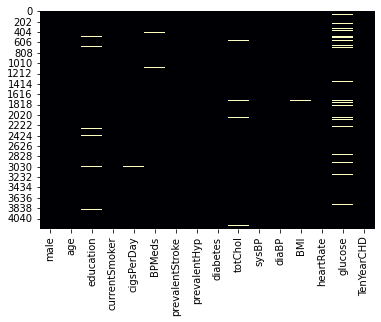

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False); 

We notice various null values in columns "education", "cigsPerDay", "BMI" and more. The presence of nulls in columns such as education, cigsperday may not indicate lack of data, but rather indicates that the column was not applicable to the respective patient . (For example 0 in "cigsperday" might indicate that the person does not smoke)

But null values in columns such as totChol, BMI, heartrate and glucose need to be addressed as all patients usually have these records (human nature).

So we need to remove the respective rows to have a clear picture.

## 1.1 Dealing with Null values

In [ ]:
df.dropna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


**Removing Null values**

In [ ]:
df.dropna(subset=['BMI', 'heartRate', 'totChol','glucose' ], inplace=True)
df.isna().sum()

male                0
age                 0
education          95
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

## 1.2 Ensuring consistency in column names

Converting all column names in the lower sentence case

In [ ]:
df.columns= df.columns.str.lower()
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#**Data modifications**
**Converting Binary values to String format**

We notice that for further visualisations, its good to have columns such as "male" - defined as "male" and "female" instead of 0 and 1, for easy understandability. So let's make similar changes for other variables by adding new columns, replacing 0 and 1 with categorical names (yes/no).

In [ ]:
import numpy as np
df['sex'] = df['male']
df["sex"] = np.where(df["sex"] == 0, "female",  "male")

df['currentsmoker_value'] = df['currentsmoker']
df["currentsmoker_value"] = np.where(df["currentsmoker_value"] == 0, "No",  "Yes")

df['prevalentstroke_value'] = df['prevalentstroke']
df["prevalentstroke_value"] = np.where(df["prevalentstroke_value"] == 0, "No",  "Yes")

df['prevalenthyp_value'] = df['prevalenthyp']
df["prevalenthyp_value"] = np.where(df["prevalenthyp_value"] == 0, "No",  "Yes")

df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd,sex,currentsmoker_value,prevalentstroke_value,prevalenthyp_value
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,male,No,No,No
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,female,No,No,No
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,male,Yes,No,No
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,female,Yes,No,Yes
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,female,Yes,No,No


For better grouping, clubbing the ages of the patients into groups of 0-18, 18-28, 28-38 and so on

In [ ]:
ranges = [0,18,28,38,48,58,68,78,88]
group_names = ['0-18', '18-28', '28-38', '38-48', '48-58', '58-68', '78-88', '88-98']
df['agerange'] = pd.cut(df['age'], bins = ranges, labels = group_names)

#**2. Data Aggregation**

## 2.1 Summary statistics

In [ ]:
df.describe()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
count,3827.000000,3827.000000,3732.000000,3827.000000,3802.000000,3776.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000,3827.000000
mean,0.443428,49.619545,1.978296,0.490724,8.997633,0.030191,0.005749,0.313039,0.027175,237.027437,132.446825,82.958976,25.807201,75.731382,81.909851,0.152861
std,0.496854,8.574815,1.022560,0.499979,11.931059,0.171134,0.075611,0.463791,0.162615,44.768324,22.074471,11.965641,4.066855,11.937477,23.753878,0.359901
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.050000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Interesting insights:**

We notice that the age group observed in the dataset are between 32 and 70 years - so most of the recorded population are adults to senior citizens. 

We also notice the biggest standard deviation in "totchol" column (44.7) followed by "glucose" column (23.7).

75% of the records are under the age of 56.

Corrrelation matrix

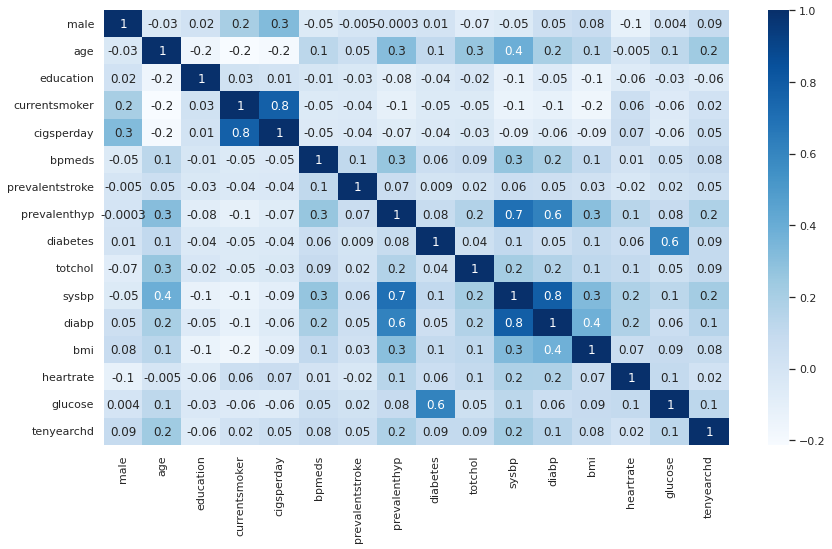

In [ ]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
cormat = df.corr()
sns.heatmap(cormat, annot=True, cmap="Blues", fmt='.1g');

**Insights:**

We notice that "age" and "sysbp" are slightly corelated (0.4 score) and theres a strong corelation between "preventhyp" and "sysbp" with a correlation score of 0.7. 

In addition, "diabetes" and "glucose" also very high relation score of 0.6

## 2.3 Mean values 

In [ ]:
df.mean()

<ipython-input-13-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


male                 0.443428
age                 49.619545
education            1.978296
currentsmoker        0.490724
cigsperday           8.997633
bpmeds               0.030191
prevalentstroke      0.005749
prevalenthyp         0.313039
diabetes             0.027175
totchol            237.027437
sysbp              132.446825
diabp               82.958976
bmi                 25.807201
heartrate           75.731382
glucose             81.909851
tenyearchd           0.152861
dtype: float64

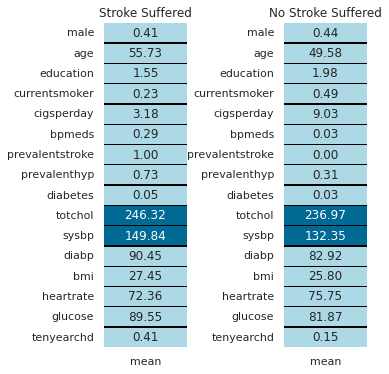

In [ ]:
stroke = df[df['prevalentstroke'] == 1].describe().T
no_stroke = df[df['prevalentstroke'] == 0].describe().T

colors = ['#ADD8E6','#006994']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.3,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.3,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');
fig.tight_layout(pad = 0)

**Insight**

While comparing the mean figures between those who suffered stroke vs those who havent, we see a key indicator - "cigsperday", which highlights how patients who smoked twice as much as other patients, did not infact experience stroke.

## 2.4 Count

In [ ]:
df.count()

male                     3827
age                      3827
education                3732
currentsmoker            3827
cigsperday               3802
bpmeds                   3776
prevalentstroke          3827
prevalenthyp             3827
diabetes                 3827
totchol                  3827
sysbp                    3827
diabp                    3827
bmi                      3827
heartrate                3827
glucose                  3827
tenyearchd               3827
sex                      3827
currentsmoker_value      3827
prevalentstroke_value    3827
prevalenthyp_value       3827
agerange                 3827
dtype: int64

In [ ]:
df['prevalentstroke'].count()

3827

**Classified count for categories**

In [ ]:
df[['sex']].value_counts()

sex   
female    2130
male      1697
dtype: int64

The record holds more female records than males.

In [ ]:
df[['currentsmoker_value']].value_counts()

currentsmoker_value
No                     1949
Yes                    1878
dtype: int64

The records indicate almost an equal distribution of the number of people who smoke and dont smoke

In [ ]:
df[['prevalentstroke_value']].value_counts()

prevalentstroke_value
No                       3805
Yes                        22
dtype: int64

We see that the data is very skewed with more than 90% of the data points falling in the "No" segment of the "prevalentstroke_value" column.

In [ ]:
df.groupby("sex")["currentsmoker"].count()

sex
female    2130
male      1697
Name: currentsmoker, dtype: int64

Females tend to smoke more than males

In [ ]:
df['prevalenthyp_value'].value_counts()

No     2629
Yes    1198
Name: prevalenthyp_value, dtype: int64

More people experience hyper tension

##2.5 Min, Max, Median

In [ ]:
df['age'].max()

70

The maximum age of the dataset is 70

In [ ]:
df['age'].min()

32

The minimum age of the dataset is 32

In [ ]:
df['sysbp'].median()

128.0

The median value of the systolic blood pressure in the dataset is 128

#**Data Exploration**


In [ ]:
df.groupby("sex")["cigsperday"].count()

sex
female    2117
male      1685
Name: cigsperday, dtype: int64

The past analysis( females smoking more than males) is also supported by this data showing females consuming higher **cigarretes per day** than males

In [ ]:
df.groupby("sex")["prevalenthyp"].count()

sex
female    2130
male      1697
Name: prevalenthyp, dtype: int64

Here we note that the **Female population seem to have higher instances of prevalent hyper tension**, which could potentially stem from the fact that the females also consume more cigarretes than males

In [ ]:
df.groupby("currentsmoker_value")["prevalenthyp"].count()

currentsmoker_value
No     1949
Yes    1878
Name: prevalenthyp, dtype: int64

But when it comes to heart strokes, it's interesting to note that **the current smoking status has no major influence on experiencing heart strokes**. 

In [ ]:
df.groupby("agerange")["prevalentstroke"].count()

agerange
0-18        0
18-28       0
28-38     348
38-48    1526
48-58    1218
58-68     728
78-88       7
88-98       0
Name: prevalentstroke, dtype: int64

People aged 38-48 tend to experience the highest number of strokes.

#**3. Visualisations**

##3.1 Sex Based Classification On Glucose value

We can start with checking how the glucose value varies amongst men and women across different age groups

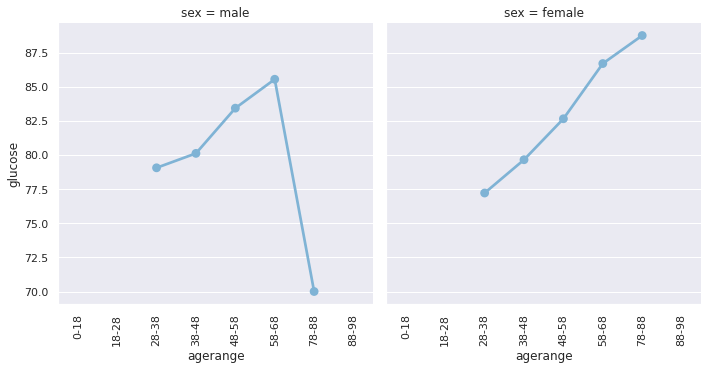

In [ ]:
g=sns.catplot(y='glucose', x= 'agerange' ,data= df,kind='point',col='sex',ci=None)
g.set_xticklabels(rotation=90);

**Observation - From the above graph we note the following trends:**

**1. Overall, the glucose level of males witnesses an increasing trend from age 28-68 (ranging around 78 to 85 in value). But soon after the population crosses the 58-68 age bracket, the glucose levels drastically falls down to 70 in the age group 78-88**

**2. On the other hand, females also see a steady increase in their glucose levels  across all age groups from 28 to 88, ranging around a glucose value from 77 to 88**


##3.2 Prevalent Hyper Tension Across Age Groups


Since we noticed how females experienced more hyper tension than males, it might be interesting to see how hyper tension trend varies across age groups

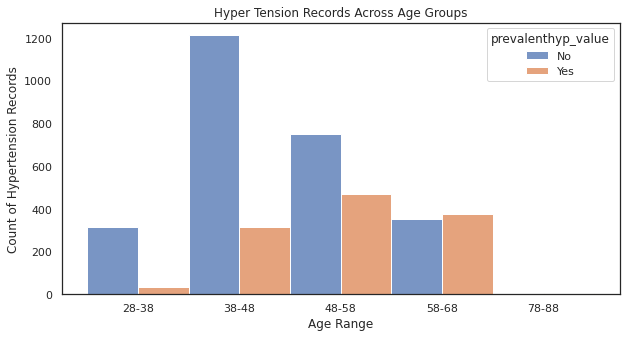

In [ ]:
plt.figure(figsize=(10,5))
pic = sns.histplot(data = df, x = 'agerange', hue = 'prevalenthyp_value', multiple="dodge", bins=7)
plt.title("Hyper Tension Records Across Age Groups")
plt.xlabel("Age Range")
plt.ylabel("Count of Hypertension Records");

**Observation - From the above graph we note the following trends:**

**1. As age increases, the incidence of hyper tension increases among individuals**

**2. We also see that Individuals who are aged between 28-38 have the lowest incidence of hyper tension and the highest number of recorded hyper tension cases are in the age group 48-58**

**So we can assume that, aging individuals face higher stress due to their work life, and other personal issues, leading to a higher hyper tension level.**

##3.3 Systolic Blood Pressure Across Age Groups

Diving further into other attributes such as "sysbp" (one of the key health indicators) across different ages and different genders might add value to our analysis.

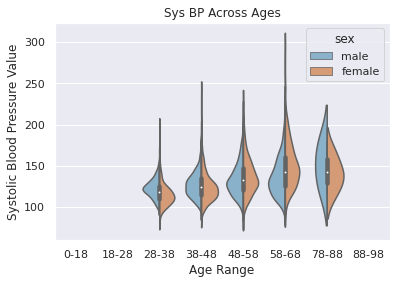

<Figure size 720x432 with 0 Axes>

In [ ]:
sns.violinplot(x =df["agerange"], y = df["sysbp"], hue = df["sex"], split=True);
plt.title('Sys BP Across Ages')
plt.xlabel('Age Range')
plt.ylabel('Systolic Blood Pressure Value')

plt.figure(figsize=(10, 6))

#fig.set_figwidth(15)
#fig.set_figheight(20)
plt.show() ;

**Observation - From the above graph we note the following trends:**

**1. The systolic blood pressure shows a linear trend; the "sysbp" value increases, as the age increases for the male and the female population.**

**2. We also see how the female poulation have a higher "sysbp" value than males, with increase in the age**

##3.4 Total Cholestrol Level For Genders Across Age Ranges

So far we have noticed how females tend to smoke more, have higher "sysbp" and "prevalent_hyp" values. 

We can have a look if this is the same case with "totchol" - one of the biggest causes of heart strokes

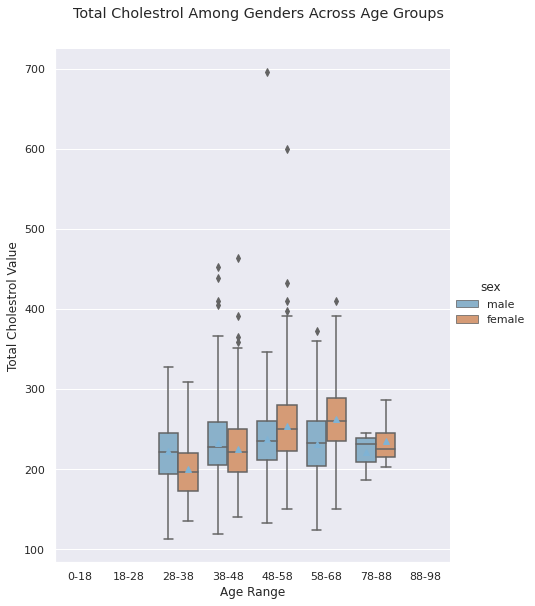

In [ ]:
sns.set_palette(["#7FB3D5","#E59866"])
sns.set_style('darkgrid')
sns.set_context('notebook')
g= sns.catplot(x="agerange", y="totchol", data=df,kind='box', hue='sex', whis=2.0, height=8, aspect=9/11,showmeans=True) 
g.fig.suptitle('Total Cholestrol Among Genders Across Age Groups',y=1.05)
g.set(xlabel='Age Range', ylabel='Total Cholestrol Value')
plt.show();

**Observation - From the above graph we note the following trends:**

**1. Overall, the mean cholestrol level of females is lower than that of males in the age group 28-38 (around 200 - females and 220 - males) and 38-48 (220- females and 240 - males).**

**But in the age group 48-58, we see that females have a higher mean cholestrol level around 250.**

**2. Overall we notice that as female population ages, the cholestrol level faces an increase. While for the male population we see that the cholestrol level stagnates across higher age ranges** 

**3. There are also few outliers in the data in the age range 48-58 having cholestrol values around 600 and 700**


##3.5 Checking Diabetes Values Across Diffrent Age Groups and Ten Year Chd

Diabetes is also a major concern amongst the population. Comparing how diabetes and Ten year CHD is related amongst age groups might be useful

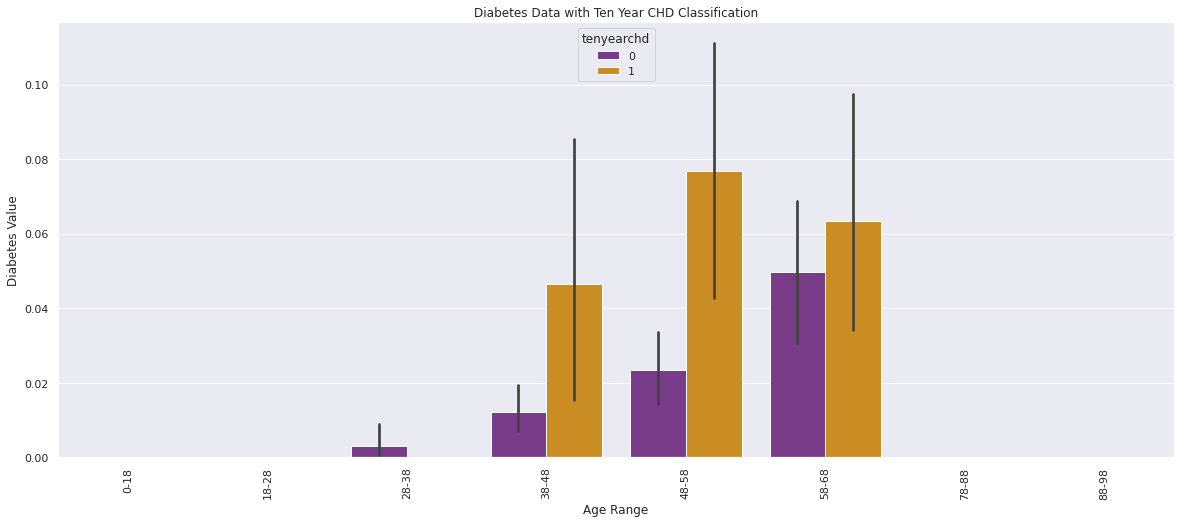

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Diabetes Data with Ten Year CHD Classification")
sns.barplot(x = 'agerange', y ='diabetes', data= df, hue = "tenyearchd", palette = 'CMRmap')
plt.xlabel('Age Range')
plt.ylabel('Diabetes Value')
plt.xticks(rotation = 90)
plt.show()

**Observation - From the above graph we note the following trends:**

**1. The diabetes value increase in the population as they age**

**2. But we also see that people with ten year CHD tend to record a higher diabetes value as they age, especially in the age range 38-48 and 48-58, which later falls in value for the population aged 58-68**


#4. Conclusion

The dataset highlights how females tend to have poorer health in comparison to males in terms of hyper tension values, systolic blood pressure, total cholestrol, etc,  from our findings. We also notice that **age plays an important role** in the overall population's health. 

We found how male and female tend to experience higher glucose, diabetes, cholestrol values etc, as they age. 

Sufficient healthcare must be extended to all populations with concentration to the women and the aged population who seem to be sensitive to age and health conditions.
